## Exemplo 1 - Treinamento de uma GaussianNB com dados aleatórios

In [1]:
# Importação de algumas bibliotecas
from sklearn.datasets import make_classification # Importa a classe que cria um conj de dados aleatório
from sklearn.naive_bayes import GaussianNB # Importa o modelo baseado no teorema de Naive Bayes
import matplotlib.pyplot as plt # Importa o módulo pyplot para geração de gráficos 
import seaborn as sns # Importa a biblioteca seaborn para geração de gráficos
import numpy as np

import warnings
warnings.filterwarnings("ignore") # Impede a exibição de alguns avisos

In [2]:
# Cria um conjunto de dados aleatórios X com 100 instâncias em 2 colunas e um atributo-alvo y com rótulos 0 e 1
X, y = make_classification(n_samples=100, n_features=2, n_redundant = 0, random_state = 1)

In [3]:
# Exibe os 5 primeiros vetores do conjunto de dados X e o tamanho do conjunto.
print(X[0:5])
print('\n Tamanho do conjunto de dados X:', len(X))

[[ 1.30022717 -0.7856539 ]
 [ 1.44184425 -0.56008554]
 [-0.84792445 -1.36621324]
 [-0.72215015 -1.41129414]
 [-1.27221465  0.25945106]]

 Tamanho do conjunto de dados X: 100


In [4]:
print(y)
print('\n Tamanho do conjunto de dados y:', len(y))

[1 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1
 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0]

 Tamanho do conjunto de dados y: 100


In [5]:
# Configura o modelo
model = GaussianNB()

In [6]:
# Treina o modelo
model.fit(X, y)

GaussianNB()

In [7]:
# Prevê os rótulos de cada instância com o modelo treinado
y_prevs = model.predict(X)

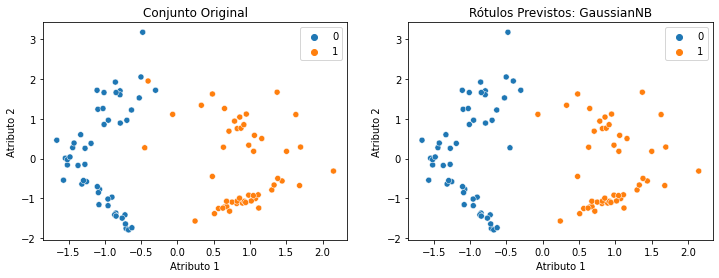

In [8]:
# Cria gráficos para comparar o conjunto de rótulos original e o previsto.
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(X[:,0], X[:,1], hue=y, ax=axes[0])
sns.scatterplot(X[:,0], X[:,1], hue=y_prevs, ax=axes[1])

axes[0].set_title('Conjunto Original')
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')

axes[1].set_title('Rótulos Previstos: GaussianNB')
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 2');

**Pode-se notar, comparando o gráfico à direita com o gráfico à esquerda, que o modelo GaussianNB apresentou um ótimo desempenho nas previsões dos rótulos 0 e 1.<br><br>
O modelo prevê 2 instâncias de maneira equivocada. Elas foram classificadas como classe 0 (azul)
quando, no conjunto original, eram de classe 1 (laranja).<br><br>
<font color='red'>NOTA</font>: Apesar do uso, para treino e teste, dos mesmos atributos previsores (X) não ser a melhor maneira de verificar a acurácia de qualquer modelo, isso foi feito apenas para fins didáticos. A ideia aqui é apenas exemplificar a utilização do algoritmo de GaussianNB, servindo apenas como material introdutório.<br><br>
Na seção a seguir, gerou-se um gráfico que mostra as classificações feitas de maneira erradas pelo modelo.**

## Exemplo 2 – Destacar as classificações erradas do exemplo 1

In [9]:
# Compara o rótulo real e previsto de cada instância
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y, y_prevs)]

In [10]:
# Exibe os dados entre as posições 10 e 20. Observe que há um False entre os booleanos (ponto previsto de forma equivocada).
y_erros[10:20]

[True, True, True, True, True, True, False, True, True, True]

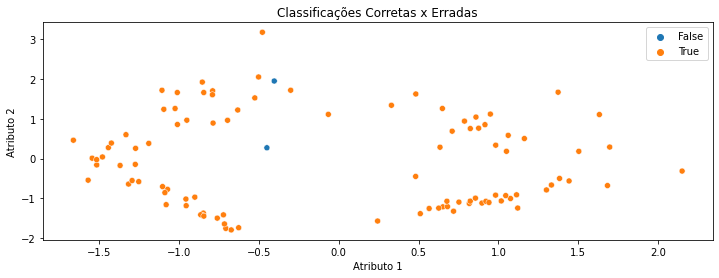

In [11]:
# Gráfico com as previsões dos rótulos corretas (amarelas) x previsões erradas (azuis)
fig, axes = plt.subplots(figsize=(12,4))
sns.scatterplot(X[:,0], X[:,1], hue=y_erros, ax=axes)
axes.set_title('Classificações Corretas x Erradas')
axes.set_xlabel('Atributo 1')
axes.set_ylabel('Atributo 2');

## Exemplo 3 – Carrega o conjunto Iris, visualiza os itens do dicionário e cria um dataframe

In [12]:
# Carrega o conj de dados Iris
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys() # Exibe os atributos do conjunto de dados Iris

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [13]:
# Carrega a biblioteca pandas para criar DataFrames
import pandas as pd
# Separa os dados em atributos previsores X e em atributo target (alvo) y
X = iris['data']
y = iris['target']

In [14]:
# Exibe os 5 primeiros vetores da variável X
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [15]:
# Exibe os 5 primeiros rótulos da variável y
y[0:5]

array([0, 0, 0, 0, 0])

In [16]:
# Cria um DataFrame, utilizando feature_names com os nomes das colunas
df = pd.DataFrame(data=X, columns=iris['feature_names'])

In [17]:
# Exibe as 3 primeiras linhas (instâncias) do dataframe df
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [18]:
# Adiciona o atributo alvo ao dataframe df, substituindo os rótulos numéricos por rótulos categóricos
df['specie'] = [iris['target_names'][t] for t in y]

In [19]:
# Exibe as 3 primeiras linhas (instâncias) do dataframe df com a coluna specie adicionada ao dataframe
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


**O conjunto de dados Iris não será exibido graficamente com todos os atributos de uma vez, diferentemente do que foi feito com o conjunto de dados aleatório do Exemplo 1. 
<br><br>
Isso se deve ao fato de existir 4 atributos previsores, ao invés de 2 como no Exemplo 1. Logo, a dimensão desse gráfico dificulta a sua visualização.
<br><br>
Em contrapartida, a biblioteca Seaborn possui um método capaz de exibir os atributos, relacionando-os aos pares e destacando as classes por cores.**

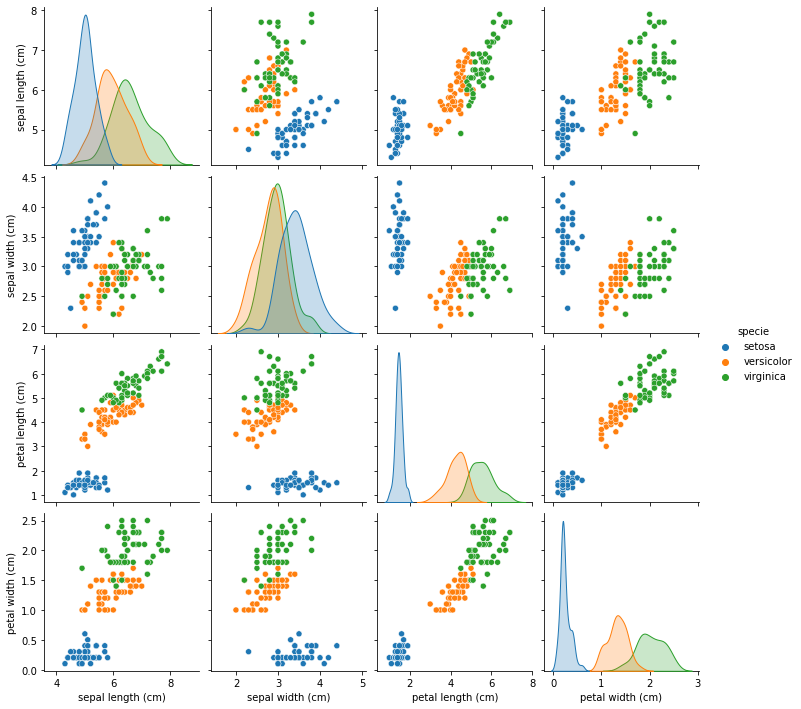

In [20]:
# Gráfico de pares de atributos
sns.pairplot(df, hue='specie');

**Para exibir o gráfico, apenas o dataframe df e o nome da coluna correspondente ao atributo alvo (specie) foram informados.
<br><br>
Na figura acima, é possível observar que nas células em que o atributo da linha e da coluna é o mesmo, o gráfico de distribuição (*scatterplot*) das instâncias é substituído por um gráfico de densidade de distribuição, agregando mais informações.**

## Exemplo 4 – Gráfico por pares de atributos com os alvos previstos

In [21]:
# Configura o modelo
model = GaussianNB()

In [22]:
# Treina o modelo com os atributos previsores X e o atributo alvo y do conjunto Iris
model.fit(X, y);

In [23]:
# Prevê os rótulos de cada instância com o modelo treinado
y_prevs = model.predict(X)

In [24]:
# Adiciona os rótulos previstos ao dataframe df, substituindo os valores discretos (0, 1 e 2) por categóricos
df['specie_prev'] = [iris['target_names'][t] for t in y_prevs]

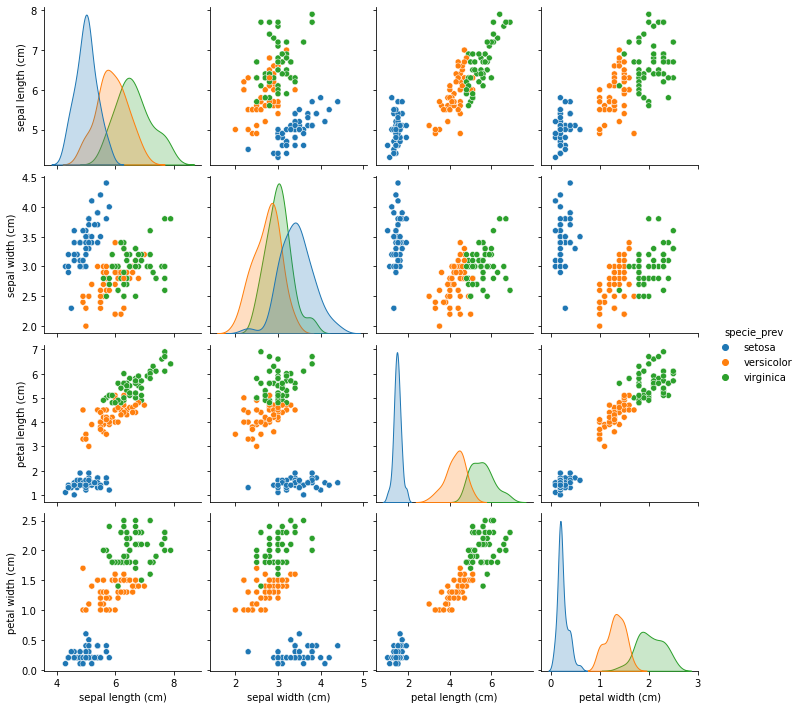

In [25]:
# Exibe o gráfico por pares com os rótulos previstos
sns.pairplot(df.drop('specie', axis = 1), hue='specie_prev');

**Ao comparar as figuras por pares do Exemplo 3 (In 20) com o deste exemplo (Exemplo 4, In 25), é possível encontrar algumas classificações diferentes, ainda que a maioria delas esteja correta.
<br><br>
Entretanto, para facilitar essa visualização, cria-se, mais uma vez, um vetor de atributo alvo, comparando as instâncias classificadas corretamente com as classificadas de forma errada.**

In [26]:
# Gráfico por pares das classificações corretas x erradas - Compara a classificação real e prevista de cada instância
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y, y_prevs)]

In [27]:
# Adiciona ao dataframe df os rótulos previstos corretamente e os previstos incorretamente
df['specie_erros'] = y_erros

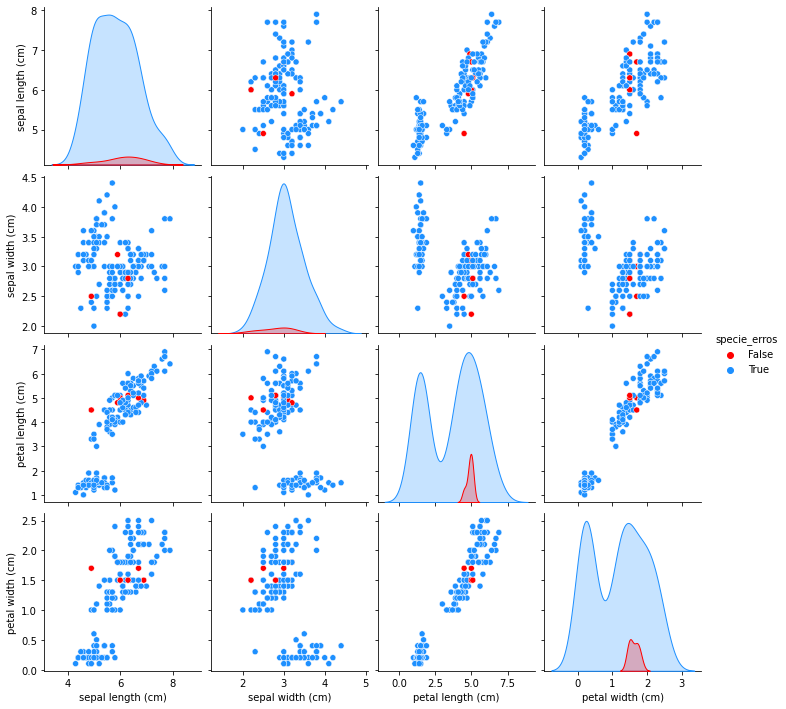

In [28]:
# Exibe o gráfico por pares dos rótulos certos/errados
sns.set_palette(['red', 'dodgerblue']) # modifica as cores dos rótulos certos/errados
sns.pairplot(df, hue='specie_erros');

**Verifica-se que houve erro na previsão de alguns rótulos (em vermelho), mas a maioria dos rótulos foram previstos corretamente.**

## Avaliação do classificador - GaussianNB

**Nos exemplos anteriores, todos os dados foram usados no treinamento do modelo e na previsão. Espera-se que, conhecendo todos os rótulos das instâncias que se pretende avaliar, o modelo classifique corretamente a grande maioria delas, quando não todas. Isso não garante que o modelo generalize suas previsões para novas instâncias. Sendo assim, é crucial que sejam usadas técnicas de amostragem antes de prosseguir com as métricas de avaliação.**

**Os modelos são treinados com amostragem por <font color='red'>*hold-out*</font> e <font color='red'>*cross-validation*</font>.**
* **<font color='red'>*hold-out*</font> --> divide o conjunto em treinamento e teste;**
* **<font color='red'>*cross-validation*</font> --> divide o conjunto de dados em grupos (também chamado de partições) de tamanhos iguais e procede com o treinamento e a previsão, utilizando um grupo para teste contra todos os demais para treinamento. No final do processo de treinamento, todos os grupos foram utiizados para teste e treinamento do modelo. O resultado <font color='red'>mais importante</font> é a <font color='red'>média</font> obtida do treinamento com todas os grupos para avaliar o desempenho no treinamento do modelo para o conjunto de dados.**

### Exemplo 5 – Conjunto de treinamento e teste ( técnica *hold-out* ) 

In [29]:
# Importa a classe que separa os dados em treinamento e teste
from sklearn.model_selection import train_test_split

In [30]:
# Armazena os nomes das colunas referentes aos atributos previsores
feats = iris['feature_names']

In [31]:
# Exibe os nomes das coluas referentes aos atributos previsores
feats

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
# Separação do conjunto de dados Iris em treinamento e teste (80% / 20%)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
# Verifica qntd de linhas e colunas em cada variável
X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((120, 4), (30, 4), (120,), (30,))

In [34]:
# Junta os dados dos arrays X_treino e X_teste. X_teste é adicionado ao final do array X_treino.
X_treino_teste = np.concatenate([X_treino, X_teste], axis=0)

In [35]:
# Junta os dados dos arrays y_treino e y_teste. y_teste é adicionado ao final do array y_treino.
y_treino_teste = np.concatenate([y_treino, y_teste], axis=0)

In [36]:
# Verifica a qntd de linhas e colunas em cada variável e os valores únicos em y_treino_teste
X_treino_teste.shape, y_treino_teste.shape, np.unique(y_treino_teste)

((150, 4), (150,), array([0, 1, 2]))

In [37]:
# Junta os dados dos arrays em colunas uma ao lado da outra. y_treino_teste é add como uma coluna ao lado de X_treino_teste.
data = np.concatenate([X_treino_teste, y_treino_teste.reshape(-1, 1)], axis = 1)

In [38]:
# Exibe os 5 primeiros vetores do array data
data[0:5]

array([[6.1, 3. , 4.6, 1.4, 1. ],
       [7.7, 3. , 6.1, 2.3, 2. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [6.4, 2.8, 5.6, 2.1, 2. ],
       [5.8, 2.8, 5.1, 2.4, 2. ]])

In [39]:
# Transforma o array data em um dataframe, com as colunas nomeadas
df = pd.DataFrame(data, columns = feats + ['specie'])

In [40]:
# Cria as nomenclaturas para os tipos de dados presentes no dataframe df

treino = ['Treino',] * 120 # Multiplica o conteúdo da lista em 120 vezes
teste = ['Teste',] * 30 # Multiplica o conteúdo da lista em 30 vezes
treino_teste = treino + teste # Junta as linhas
print(treino_teste) # Exibe o resultado da junção das listas

['Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino', 'Treino',

In [41]:
# Adiciona o tipo dos dados em df
df['Tipo'] = treino_teste

In [42]:
# Exibe as 3 primeiras instâncias em df
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie,Tipo
0,6.1,3.0,4.6,1.4,1.0,Treino
1,7.7,3.0,6.1,2.3,2.0,Treino
2,5.6,2.5,3.9,1.1,1.0,Treino


In [43]:
# Exibe as 3 últimas instâncias em df
df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie,Tipo
147,5.1,3.8,1.5,0.3,0.0,Teste
148,6.1,2.8,4.7,1.2,1.0,Teste
149,6.3,2.5,5.0,1.9,2.0,Teste


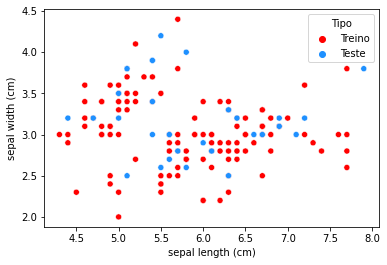

In [44]:
# Cria um gráfico de dispersão com os dados de treino e teste
sns.scatterplot(df[feats[0]], df[feats[1]], hue=df['Tipo']);

**Apenas os 2 primeiros atributos previsores, sepal length (cm) e sepal width (cm), foram utilizados para a visualização do resultado da separação dos dados**

### Exemplo 6 – Validação Cruzada ( técnica *cross-validation* ) 

**Para a técnica de validação cruzada (*cross-validation*), existe a classe KFold e os hiperparâmetros**

* **n_splits --> n° de partições dos dados (qntd de grupos)**

* **shuffle (<font color="green">True</font> or <font color="green">False</font>) --> Decide se as instâncias devem ser embaralhadas ou não**

* **random_state --> É a base para geração de números aleatórios**

In [45]:
# Importa a classe para a validação cruzada
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=1) # Configura a validação cruzada

In [46]:
# Dataframe com os atributos previsores do conjunto de dados Iris
Xdf = pd.DataFrame(X, columns=feats)

In [47]:
Xdf.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [48]:
# Armazena dataframes com diferentes grupos de dados, dividos pelo KFold
dfs = []

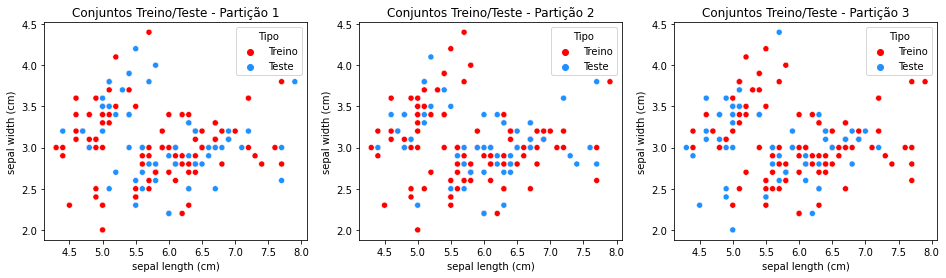

In [49]:
a = 0 # Será utilizado para nomear dataframes

# Captura os índice das instâncias dos atributos previsores e atributo alvo, embaralhando os dados a cada novo looping
for i_treino, i_teste in kfold.split(Xdf):
    
    # Cria o dataframe dftr com os dados de treino dos atributos previsores que correspondam aos índices i_treino
    dftr = pd.DataFrame(X[i_treino], index=i_treino, columns=feats)
    
    # Classifica os dados como 'Treino'
    dftr['Tipo'] = 'Treino'
    
    # Adiciona, ao final do dataframe dftr, os dados de teste dos atributos previsores que correspondam aos índices i_teste
    dftr = dftr.append(pd.DataFrame(X[i_teste], index=i_teste, columns=feats))
    
    # Adiciona aos dados de teste a classificação 'Teste'
    dftr.loc[dftr['Tipo'].isnull(), 'Tipo'] = 'Teste'
    
    # Cria o dataframe dftry com os dados de treino do atributo alvo que correspondam aos índices i_treino
    dftry = pd.DataFrame(y[i_treino], index=i_treino, columns=['specie'])
    
    # Adiciona, ao final do dataframe dftry, os dados de teste do atributo alvo que correspondam aos índices i_teste
    dftry = dftry.append(pd.DataFrame(y[i_teste], index=i_teste, columns=['specie']))
    
    # Adiciona todos os dados (rótulos) armazenados em dftry no dataframe dftr
    dftr['specie'] = dftry
    
    # Cria um dataframe dftr_# que é uma cópia exata do dftr
    vars()[f'dftr_{a}'] = dftr.copy()
    
    # Adiciona o dataframe dftr_# à lista dfs
    dfs.append(vars()[f'dftr_{a}'])
    
    a += 1 # Soma 1 ao valor da variável global 'a'
    
# Cria uma figura vazia
fig, axes = plt.subplots(1,3,figsize=(16,4))

# Captura cada dataframe dentro da lista dfs (3, no total), juntamente com seus índices que variam entre 0 e 2
for i, dff in enumerate(dfs):
    
    # Cria um gráfico de dispersão com apenas as colunas sepal length (cm) e sepal width (cm)
    sns.scatterplot(dff[feats[0]], dff[feats[1]], hue=dff['Tipo'], ax=axes[i])
    
    # Adiciona um título ao gráfico de dispersão
    axes[i].set_title('Conjuntos Treino/Teste - Partição {0}'.format(i+1))

**Os 3 gráficos acima mostram a criação de três partições (grupos) pela classe KFold e exibe a distribuição dos dados em conjuntos de teste e treinamento.**

**O dataframe, a seguir, compara o treinamento executado com ambos os métodos (*Hold-out* e *KFold*), mensurando a acurácia obtida. Para isso, a coluna ‘tipo’, utilizada na exibição das instâncias de cada conjunto, foi eliminada de cada dataframe.**

### Exemplo 7 – Acurácia

In [50]:
# Importa a classe para avaliação do modelo GaussianNB
from sklearn.metrics import accuracy_score

In [51]:
# Faz uma cópia da lista dfs na qual contém 3 dataframes com dados divididos pela validação cruzada
# Cada dataframe corresponde a 1 partição dos dados originais
dfss = dfs.copy()

In [52]:
# Exibe o 1° dos 3 dataframes presentes na lista dfss
dfss[0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Tipo,specie
0,5.1,3.5,1.4,0.2,Treino,0
1,4.9,3.0,1.4,0.2,Treino,0
2,4.7,3.2,1.3,0.2,Treino,0
3,4.6,3.1,1.5,0.2,Treino,0
6,4.6,3.4,1.4,0.3,Treino,0
...,...,...,...,...,...,...
128,6.4,2.8,5.6,2.1,Teste,2
131,7.9,3.8,6.4,2.0,Teste,2
135,7.7,3.0,6.1,2.3,Teste,2
141,6.9,3.1,5.1,2.3,Teste,2


In [53]:
# Adiciona, ao final da lista, o dataframe criado para armazenar os dados obtidos pela técnica hold-out
dfss.append(df)

In [54]:
# Chaves - nome atribuído a cada dataframe
keys = ['KFold 1', 'KFold 2', 'KFold 3', 'Hold-Out']

In [55]:
# Atribui uma chave a cada dataframe da lista dfss e salva os pares chave:dataframe em um dicionário
dic_df = {k: d for k, d in zip(keys, dfss)}
dic_df['KFold 1'] # Exibe o dataframe acessado pela chave 'KFold 1'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Tipo,specie
0,5.1,3.5,1.4,0.2,Treino,0
1,4.9,3.0,1.4,0.2,Treino,0
2,4.7,3.2,1.3,0.2,Treino,0
3,4.6,3.1,1.5,0.2,Treino,0
6,4.6,3.4,1.4,0.3,Treino,0
...,...,...,...,...,...,...
128,6.4,2.8,5.6,2.1,Teste,2
131,7.9,3.8,6.4,2.0,Teste,2
135,7.7,3.0,6.1,2.3,Teste,2
141,6.9,3.1,5.1,2.3,Teste,2


In [56]:
accs = []

# Acessa cada chave (k) e seu respectivo dataframe (d) dentro do dicionário dic_df
for k, d in dic_df.items():
    
    # Filtra os dados de X_treino, onde o tipo == Treino; deleta a coluna Tipo do dataframe e transforma o dataframe em um array
    X_treino = d[d['Tipo']=='Treino'].drop(labels=['Tipo'], axis=1).values
    
    # Filtra os dados de X_teste, onde o tipo == Teste, deleta a coluna Tipo do dataframe e transforma o dataframe em um array
    X_teste = d[d['Tipo']=='Teste'].drop(labels=['Tipo'], axis=1).values
    
    # Filtra os dados de y_treino, onde o tipo == Treino; salva só os dados da coluna specie e transforma o dataframe em array
    y_treino = d[d['Tipo']=='Treino']['specie'].values
    
    # Filtra os dados de y_teste, onde o tipo == Teste; salva só os dados da coluna specie e transforma o dataframe em array
    y_teste = d[d['Tipo']=='Teste']['specie'].values
    
    # Configura o modelo GaussianNB 
    model = GaussianNB(var_smoothing = 1)
    
    # Treina o modelo
    model.fit(X_treino, y_treino)
    
    # Armazena a chave do dataframe + o valor de acurácia dentro de uma lista e adiciona essa lista dentro de outra lista (accs)
    accs.append([k, accuracy_score(y_teste, model.predict(X_teste))])

# Transforma os objetos contidos na lista acss em um dataframe, cujas colunas são 'Partição' e 'Acurácia'
acc_df = pd.DataFrame(accs, columns=['Partição', 'Acurácia'])

# Adiciona o valor da média das acurácias obtidas por cada um dos KFolds no final do dataframe acc_df
acc_df.append(pd.DataFrame([['Média KFold', float(acc_df[:3].mean())]], columns=['Partição', 'Acurácia'], index=[len(acc_df)]))

,Partição,Acurácia
0,KFold 1,0.980000
1,KFold 2,0.880000
2,KFold 3,0.960000
3,Hold-Out,0.966667
4,Média KFold,0.940000


**É possível observar que cada amostragem (todas apresentadas na coluna Partição) obteve um desempenho diferente para a métrica da acurácia.
<br><br>
Nesse caso, o melhor desempenho (maior acurácia) foi obtido pela técnica KFold 1.
<br><br>
É importante salientar que o desempenho do modelo, tanto para os KFold's quanto para a técnica *hold-out*, está sujeita à aleatoriedade da seleção das instâncias. Em outras palavras, caso o valor do hiperparâmetro <font color='red'>random_state</font> fosse mudado na classe para validação cruzada (KFold) e na classe para *hold-out* (train_test_split), os valores de acurácia apresentados no dataframe <font color='red'>acc_df</font> provavelmente mudariam também.
<br><br>
É provável que alterando o valor do hiperparâmetro <font color='red'>var_smoothing</font> do modelo GaussianNB, a acurácia sofresse alteração também, uma vez que o modelo seria treinado considerando uma variância máxima diferente.
<br><br>
O uso da validação cruzada poderia ser simplificado pelo método <font color='red'>cross_val_score</font> (apresentado, a seguir, no Exemplo 8), que recebe o modelo e os conjuntos com atributos previsores e alvo. Nele, são informadas a quantidade de partições desejadas e a métrica de avaliação.**

### Exemplo 8 – Acurácia pelo cross_val_score

In [57]:
# Importa a classe para validação cruzada mais simplificada
from sklearn.model_selection import cross_val_score

In [58]:
# Separa o conjunto de dados Iris em atributos previsores (X) e target (y)
X = iris['data']
y = iris['target']

In [59]:
# Salva os dados em um dataframe
df_cross_val_score = pd.DataFrame(data=X, columns=iris['feature_names'])

In [60]:
# Adiciona a coluna specie ao dataframe, juntamente com seus dados (y)
df_cross_val_score['specie'] = y

In [61]:
# Salva todos os valores dos atributos previsores em um array para posterior treinamento do modelo
X = df_cross_val_score.values
    
# Salva os rótulos do atributo-alvo
y = df_cross_val_score['specie'].values
    
# Configura o modelo
model = GaussianNB(var_smoothing=1)
    
# Faz a validação cruzada (5 KFold's), retorna os valores de acurácia (5 valores, no total) e salva em um dataframe
pd.DataFrame(cross_val_score(model, X, y, cv = 5), columns=['Acurácia'])

,Acurácia
0,0.966667
1,1.000000
2,1.000000
3,1.000000
4,1.000000
